# Datasets

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('../../data/iris.csv')

In [17]:
def determine_target(species):
    if species == 'setosa':
        return 0
    
    if species == 'virginica':
        return 1
    
    if species == 'versicolor':
        return 2

df['target'] = df.species.apply(determine_target)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


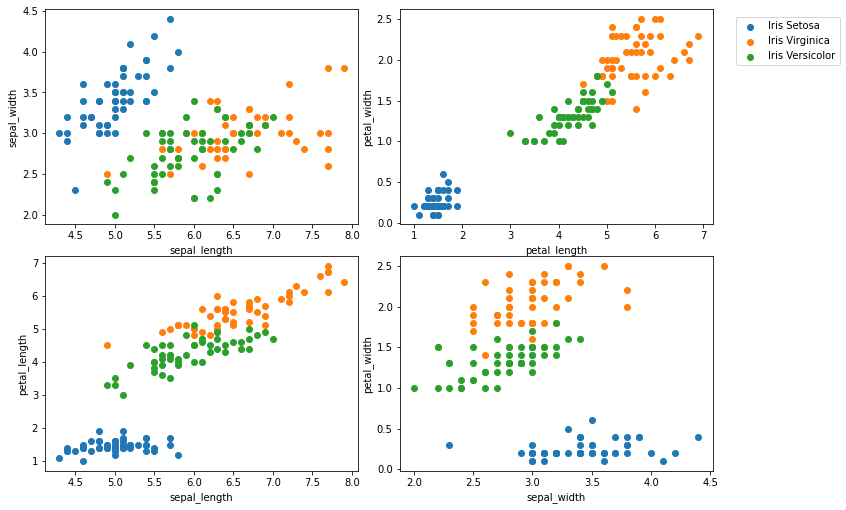

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1), (2,3), (0,2), (1,3)]
labels = ['Iris Setosa', 'Iris Virginica', 'Iris Versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target'] == j][x], df[df['target'] == j][y])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1., .85))
plt.show()

### SKLearn

In [20]:
# Get train test split.
from sklearn.model_selection import train_test_split

In [22]:
features = df.drop('species', axis=1).drop('target', axis=1).values
label = df['target'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [25]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Get it as a column by reshaping.
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

### PyTorch Data Loaders

In [26]:
from torch.utils.data import TensorDataset, DataLoader

In [27]:
data = df.drop('species', axis=1).drop('target', axis=1).values
label = df['target'].values

In [28]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(label))
type(iris)

torch.utils.data.dataset.TensorDataset